In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('white')
sns.set_context('notebook')

In [3]:
import matplotlib.pyplot as plt

def plot_sphere_proj(df):
    """
    Plots sky brightness as a function of azimuth and elevation using 
    an azimuthal equidistant projection.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az', 'Alt', and 'current_mean' columns.
    """
    
    # Create figure and axes with polar projection
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

    # Convert Azimuth to radians
    azimuth_rad = np.deg2rad(df['Az'])

    # Plot brightness as a scatter in polar coordinates (azimuth, altitude)
    sc = ax.scatter(azimuth_rad, df['Alt'], c=np.log10(np.abs(df['current_mean'])*6.28e18), cmap='plasma', s=500)

    # Customize plot
    plt.colorbar(sc, label=r'Sky Brightness $[log(e^- / sec)]$')
    ax.set_theta_zero_location('N')  # North at the top
    ax.set_theta_direction(-1)       # Clockwise direction
    ax.set_xlabel('Azimuth (Az)')
    ax.set_ylabel('Elevation (Alt)')
    t0 = df['local_time'].iloc[0]
    tend = df['local_time'].iloc[-1]
    plt.title(f"Polar Proj, Sky Brightness \n Sep 26 from {t0} to {tend}")
    
    # Show the plot
    plt.tight_layout()
    plt.savefig('polar_map_sky_brightness_test26Sep_outside_auxtel_dome_360deg',dpi=120)

# Example usage:
# plot_sphere_proj(df)

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

def plot_2d_surface(df):
    """
    Plots sky brightness as a 2D surface plot (Alt vs Az) using nearest interpolation.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Az', 'Alt', and 'current_mean' columns.
    """
    
    # Create a grid for the interpolation
    grid_x, grid_y = np.mgrid[df['Az'].min()-5:df['Az'].max()*1.1:200j, 
                              df['Alt'].min()-5:df['Alt'].max()*1.1:100j]

    # Interpolate the data using nearest neighbor method
    grid_z = griddata((df['Az'], df['Alt']), np.log10(np.abs(df['current_mean'])*6.28e18), 
                      (grid_x, grid_y), method='nearest')

    # Create the figure and axis
    plt.figure(figsize=(8, 6))

    # Plot the interpolated surface
    plt.imshow(grid_z.T, extent=(df['Az'].min()-5, df['Az'].max()*1.1, 
                                 df['Alt'].min()-5, df['Alt'].max()*1.1),
               origin='lower', aspect='auto', cmap='plasma', interpolation='nearest')
    # Add labels and title
    plt.xlabel('Azimuth (Az)')
    plt.ylabel('Elevation (Alt)')
    t0 = df['local_time'].iloc[0]
    tend = df['local_time'].iloc[-1]
    plt.title(f"Sky Brightness \n Sep 26 from {t0} to {tend}")
    plt.plot(df['Az'], df['Alt'], 'kx', markersize=10)
    
    # Add colorbar for brightness levels
    plt.colorbar(label=r'Sky Brightness  $[e^- / sec]$')
    

    # Show the plot
    plt.tight_layout()
    plt.savefig('map_sky_brightness_test26Sep_outside_auxtel_dome_360deg',dpi=120)

# Example usage:
# plot_2d_surface(df)


In [4]:
# !ls ../DATA/202409/20240925.csv

In [30]:
import pandas as pd

date = '20240930'
fname = f'../DATA/{date[:-2]}/{date}.csv'

df = pd.read_csv(fname)
# df = df[np.abs(df['current_mean']) < 1]
# df = df[(df['Az']<=0)|(df['Az']>160)]
# df['Az'] = np.where(df['Az'] < 0, 180, df['Az'])

In [31]:
import pytz
# Convert the string to a datetime object
df['timestamp'] = pd.to_datetime(df['date'], utc=True)

# Define the Chilean timezone
chile_tz = pytz.timezone('America/Santiago')

# Convert the UTC timestamp to Chilean local time
df['chilean_time'] = df['timestamp'].dt.tz_convert(chile_tz)

# Format the Chilean local time to 'HH:MM am/pm'
df['local_time'] = df['chilean_time'].dt.strftime('%I:%M %p')

In [32]:
df['logMean'] = np.log10(np.abs(df['current_mean']))
df.logMean.describe()

count    269.000000
mean      -1.050597
std       17.749673
min      -10.759827
25%       -9.988310
50%       -8.683878
75%       -7.790854
max       37.995635
Name: logMean, dtype: float64

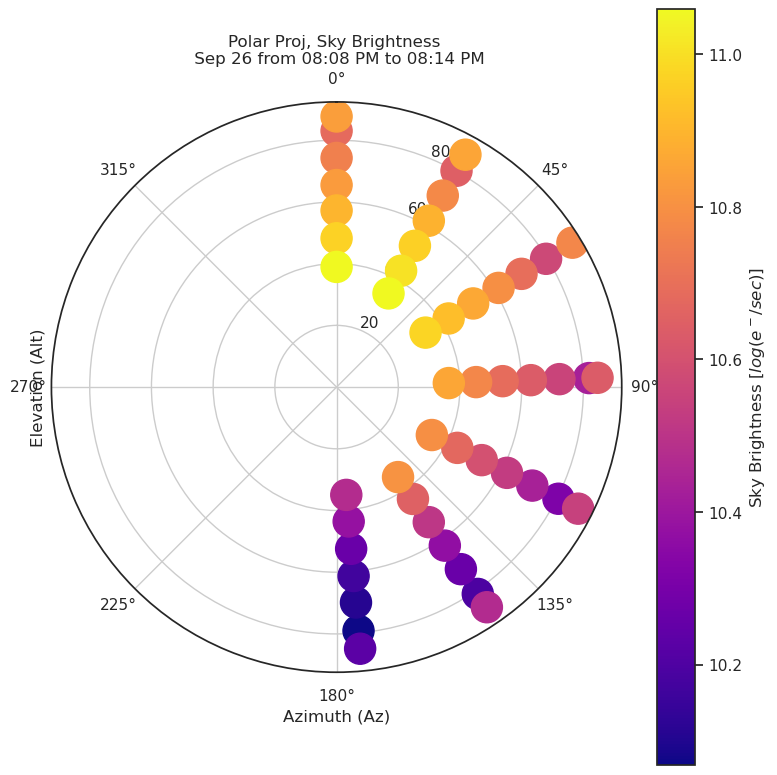

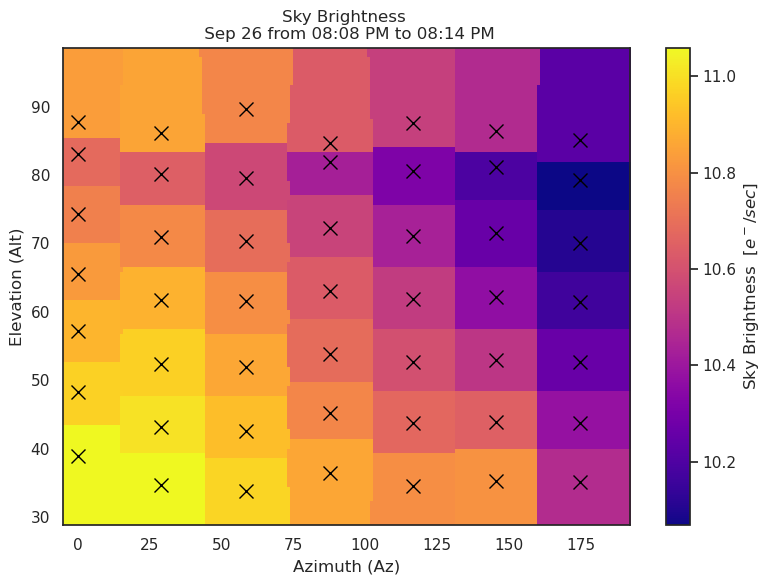

In [7]:
data = df[(df['chilean_time']< '2024-09-30 20:15:00.745279-03:00')&(df['chilean_time']>'2024-09-30 20:06:37.548306')].copy()
plot_sphere_proj(data)
plot_2d_surface(data)

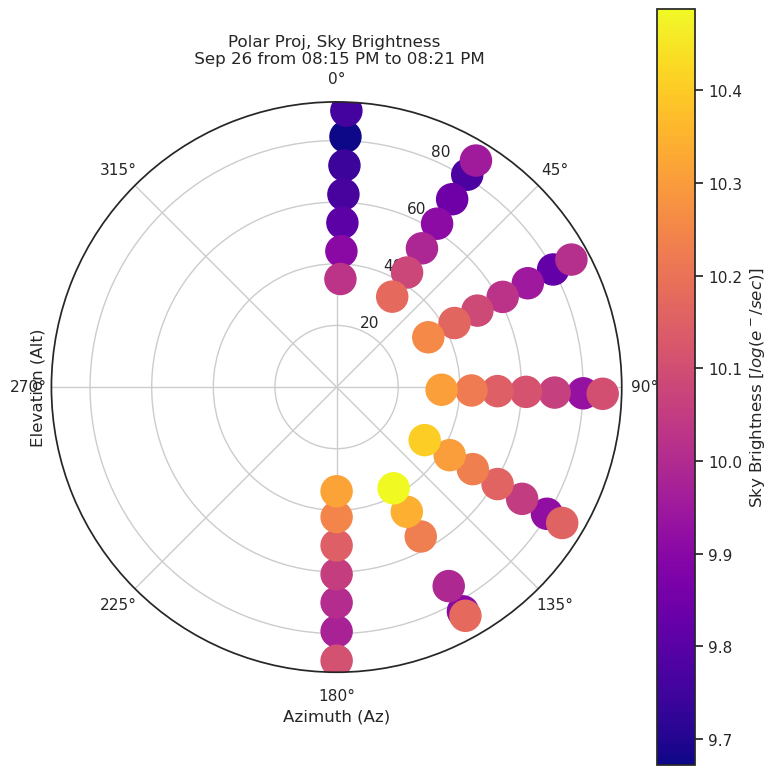

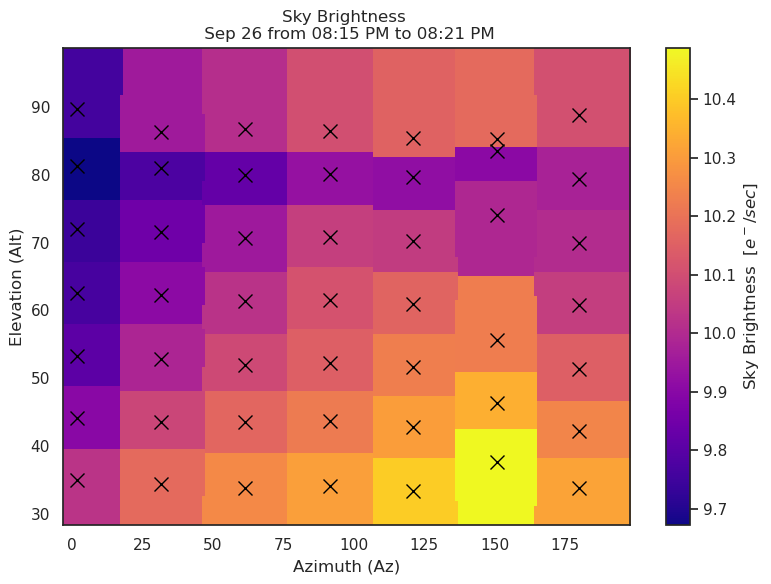

In [8]:
data = df[(df['chilean_time']> '2024-09-30 20:15:00.745279-03:00')&(df['chilean_time']<'2024-09-30 20:24:37.548306')].copy()
plot_sphere_proj(data)
plot_2d_surface(data)

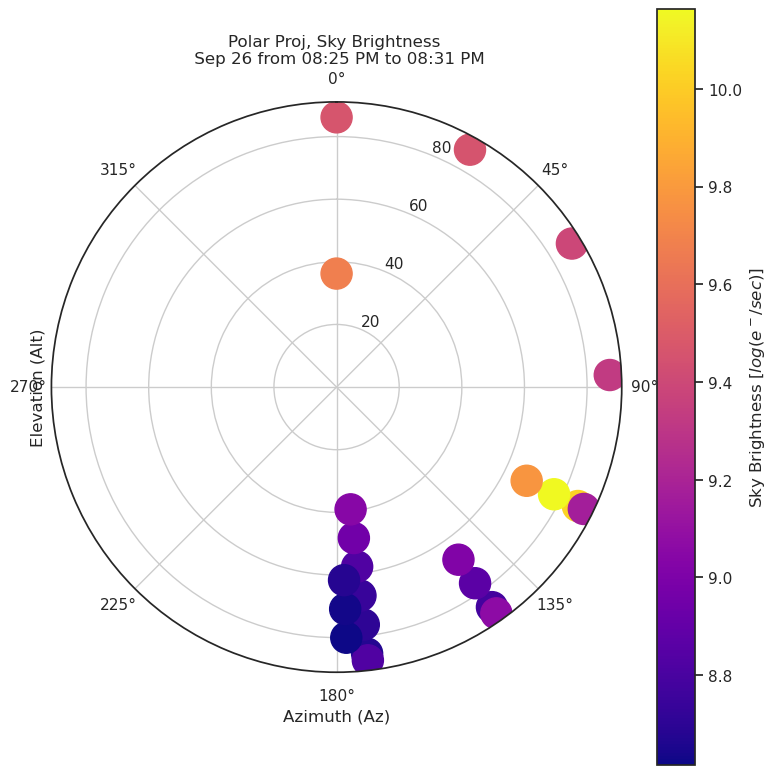

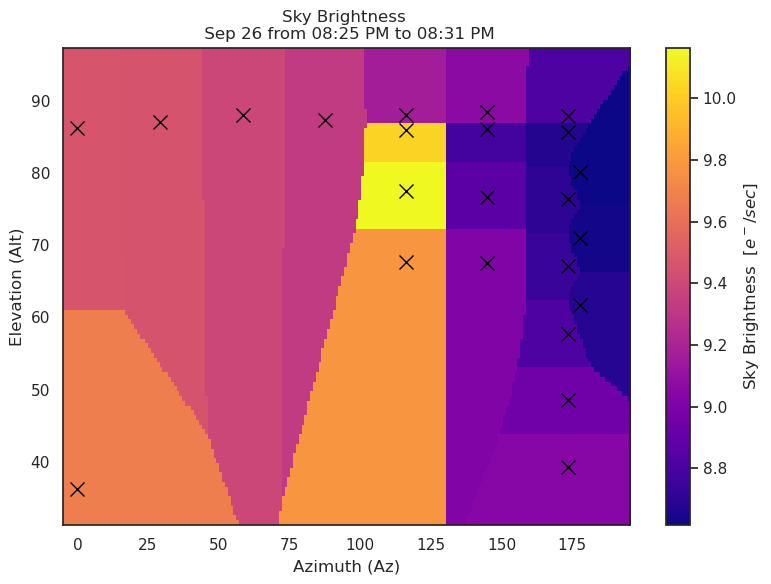

In [15]:
data = df[(df['chilean_time']> '2024-09-30 20:24:24.745279-03:00')&(df['chilean_time']<'2024-09-30 20:31:37.548306')].copy()
plot_sphere_proj(data)
plot_2d_surface(data)


In [24]:
data[['chilean_time','alt_rank','az_rank','logMean']]

,chilean_time,alt_rank,az_rank,logMean
126,2024-09-30 20:25:18.211325-03:00,6,1,-9.120518
127,2024-09-30 20:25:32.497419-03:00,0,1,-9.330019
134,2024-09-30 20:26:27.376812-03:00,0,2,-9.336357
141,2024-09-30 20:27:22.163839-03:00,0,3,-9.407906
148,2024-09-30 20:28:18.101652-03:00,0,4,-9.474567
149,2024-09-30 20:28:32.858581-03:00,1,5,-8.770462
150,2024-09-30 20:28:37.631644-03:00,2,5,-8.634881
151,2024-09-30 20:28:42.560930-03:00,3,5,-9.016203
155,2024-09-30 20:29:12.337395-03:00,0,5,-9.629740
156,2024-09-30 20:29:27.321838-03:00,1,6,-10.015367


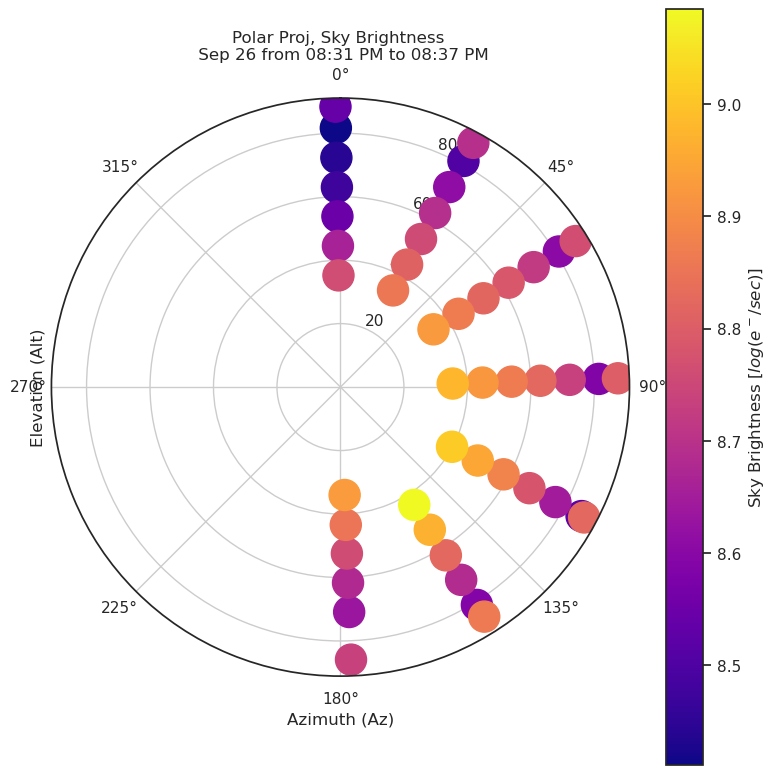

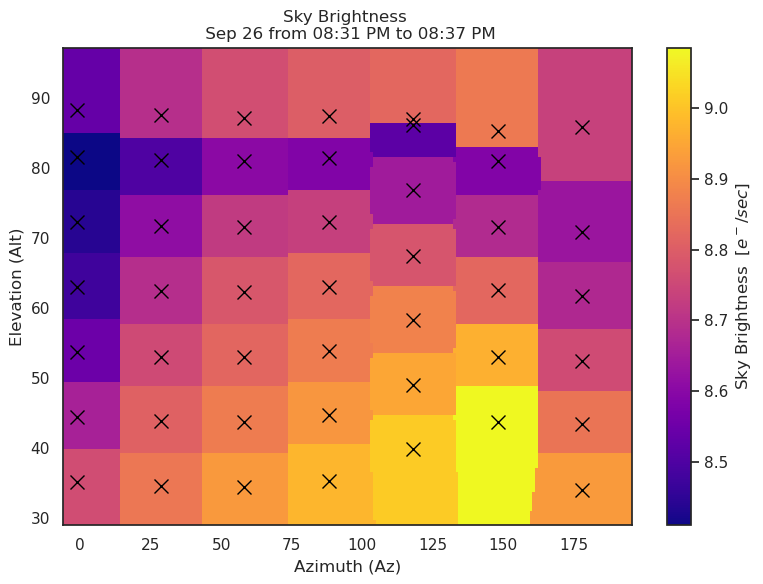

In [10]:
data = df[(df['chilean_time']> '2024-09-30 20:31:24.745279-03:00')&(df['chilean_time']<'2024-09-30 20:38:37.548306')].copy()
plot_sphere_proj(data)
plot_2d_surface(data)


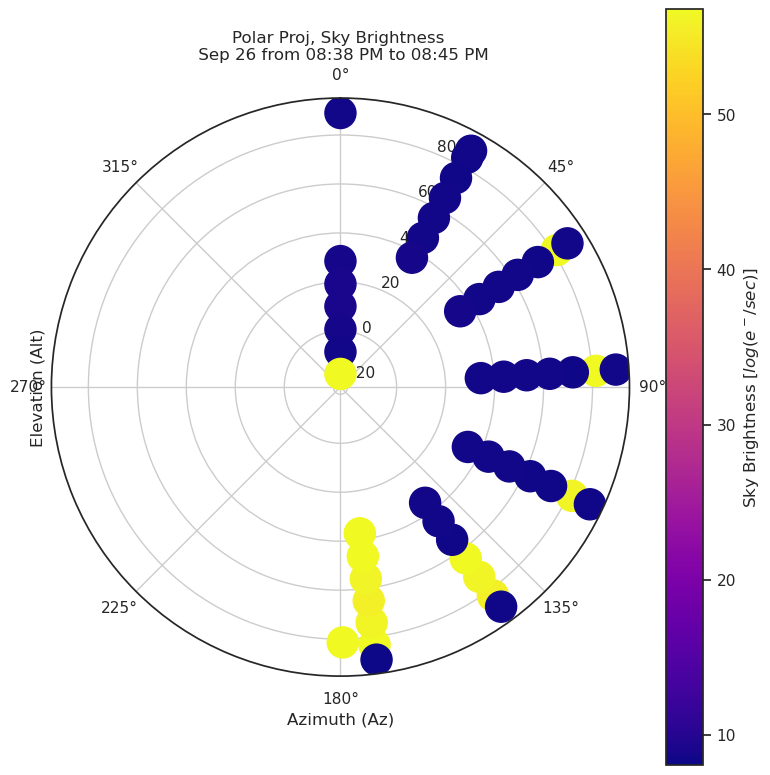

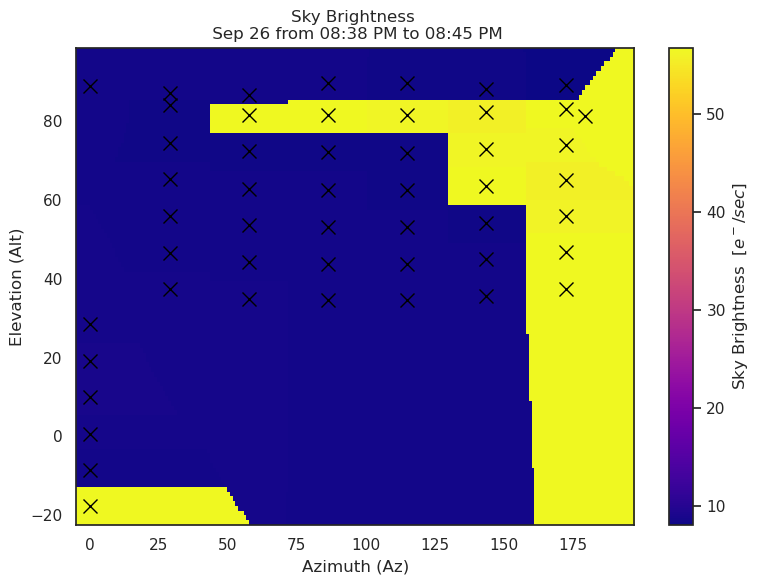

In [33]:
data = df[(df['chilean_time']> '2024-09-30 20:38:37.745279-03:00')&(df['chilean_time']<'2024-09-30 20:50:37.548306')].copy()
plot_sphere_proj(data)
plot_2d_surface(data)


In [34]:
data[['chilean_time','alt_rank','az_rank','Alt','flag','logMean']]

,chilean_time,alt_rank,az_rank,Alt,flag,logMean
219,2024-09-30 20:38:44.721667-03:00,1,1,28.50684,False,-10.027212
220,2024-09-30 20:38:49.774826-03:00,2,1,19.11915,False,-9.953863
221,2024-09-30 20:38:54.821215-03:00,3,1,10.02619,False,-9.922759
222,2024-09-30 20:38:59.881188-03:00,4,1,0.58438,False,-10.021523
223,2024-09-30 20:39:04.938136-03:00,5,1,-8.54121,False,-10.276239
224,2024-09-30 20:39:10.174003-03:00,6,1,-17.57202,False,37.995635
225,2024-09-30 20:39:38.316494-03:00,0,1,88.97939,True,-10.194129
226,2024-09-30 20:39:53.299177-03:00,1,2,84.10634,False,-10.445130
227,2024-09-30 20:39:58.362405-03:00,2,2,74.62480,False,-10.382301
228,2024-09-30 20:40:03.423911-03:00,3,2,65.29589,False,-10.314159


In [35]:
df['chilean_time']

0     2024-09-30 19:52:18.745279-03:00
1     2024-09-30 19:57:47.656052-03:00
2     2024-09-30 19:57:52.341048-03:00
3     2024-09-30 19:57:56.994287-03:00
4     2024-09-30 19:58:01.669337-03:00
                    ...               
264   2024-09-30 20:44:45.383163-03:00
265   2024-09-30 20:44:50.615321-03:00
266   2024-09-30 20:44:55.901126-03:00
267   2024-09-30 20:45:09.925144-03:00
268   2024-09-30 20:45:32.628205-03:00
Name: chilean_time, Length: 269, dtype: datetime64[ns, America/Santiago]

In [53]:
bad = df[np.abs(df['current_mean'])>1][['date', 'local_time','alt_rank','az_rank','Alt','flag','logMean']]

In [54]:
bad

,date,local_time,alt_rank,az_rank,Alt,flag,logMean
80,2024-09-30 23:16:16.349771,08:16 PM,3,6,64.90281,False,37.898725
120,2024-09-30 23:22:06.208183,08:22 PM,1,1,82.82156,False,37.995635
121,2024-09-30 23:24:50.211417,08:24 PM,1,1,81.87597,False,37.995635
122,2024-09-30 23:24:55.305235,08:24 PM,2,1,72.77997,False,37.995635
123,2024-09-30 23:25:00.374846,08:25 PM,3,1,63.67604,False,37.995635
124,2024-09-30 23:25:05.438115,08:25 PM,4,1,54.55229,False,37.995635
125,2024-09-30 23:25:10.510222,08:25 PM,5,1,45.43372,False,37.995635
128,2024-09-30 23:25:47.483090,08:25 PM,1,2,81.30868,False,37.995635
129,2024-09-30 23:25:52.563557,08:25 PM,2,2,72.23639,False,37.995635
130,2024-09-30 23:25:57.630189,08:25 PM,3,2,62.78451,False,37.995635


<Axes: >

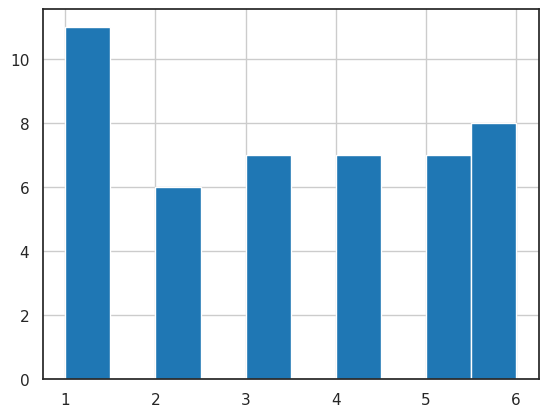

In [48]:
bad.alt_rank.hist()

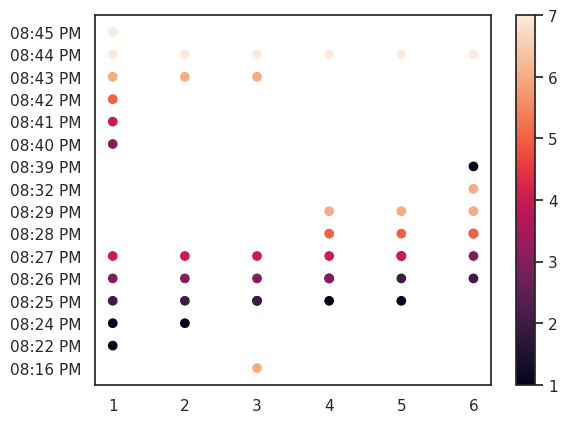

In [58]:
plt.scatter(bad.alt_rank, bad.local_time, c=bad.az_rank)
plt.colorbar()

In [52]:
100*len(bad)/len(df)

17.100371747211895

In [59]:
clean = df[np.abs(df['current_mean'])<1].copy()

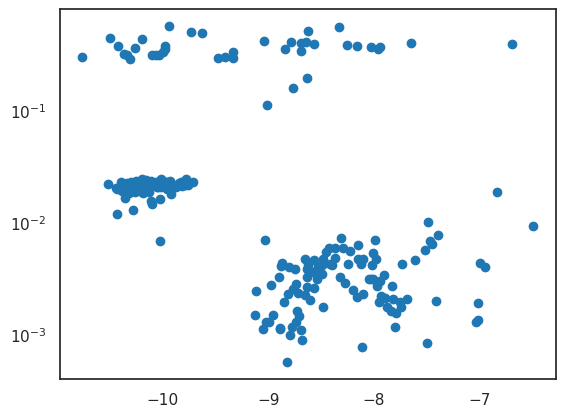

In [61]:
plt.scatter(clean['logMean'], -1*clean['current_std']/clean['current_mean'])
plt.yscale('log')

In [62]:
1/50

0.02

In [63]:
0.02*5

0.1

In [69]:
3*3*0.02

0.18

In [73]:
elevations = np.arange(25, 85, 1)
np.cos(elevations*np.pi/180)

array([0.90630779, 0.89879405, 0.89100652, 0.88294759, 0.87461971,
       0.8660254 , 0.8571673 , 0.8480481 , 0.83867057, 0.82903757,
       0.81915204, 0.80901699, 0.79863551, 0.78801075, 0.77714596,
       0.76604444, 0.75470958, 0.74314483, 0.7313537 , 0.7193398 ,
       0.70710678, 0.69465837, 0.68199836, 0.66913061, 0.65605903,
       0.64278761, 0.62932039, 0.61566148, 0.60181502, 0.58778525,
       0.57357644, 0.5591929 , 0.54463904, 0.52991926, 0.51503807,
       0.5       , 0.48480962, 0.46947156, 0.4539905 , 0.43837115,
       0.42261826, 0.40673664, 0.39073113, 0.37460659, 0.35836795,
       0.34202014, 0.32556815, 0.30901699, 0.2923717 , 0.27563736,
       0.25881905, 0.2419219 , 0.22495105, 0.20791169, 0.190809  ,
       0.17364818, 0.15643447, 0.1391731 , 0.12186934, 0.10452846])

In [74]:
elevations

array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
       42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
       59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84])

In [85]:
out = np.interp(np.linspace(0, len(elevations)-1,6),np.arange(0,len(elevations)),np.cos(elevations*np.pi/180))

In [86]:
np.arccos(out)*180/np.pi

array([25.        , 36.80187123, 48.60184886, 60.40118733, 72.20044341,
       84.        ])